In [21]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({
    'A': [1,5,3],
    'B': [1,6,5]
})

In [3]:
df

,A,B
0,1,1
1,5,6
2,3,5


In [5]:
#Gives mean of e/a column
df.mean()

A    3.0
B    4.0
dtype: float64

In [8]:
#portfolio expected return
0.5*3 + 0.5*4

3.5

### Two Asset Portfolio Variance Formula

$
\sigma_p^2 = w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2w_1w_2 \rho_{12} \sigma_1 \sigma_2
$

In [11]:
#calculating covariances
#Remember Pandas uses sample covariance which is what we use in Finance
df.cov()
#For this we are taking the covariance since we get the variance from it too
#Variance of A is equal to Cov(A,A)
#Notice the diagonal is the variances

,A,B
A,4.0,5.0
B,5.0,7.0


In [14]:
#Portfolioi variance
pf_var = 0.5**2 * 4 + 0.5**2 * 7 + 2*0.5*0.5*5

In [15]:
pf_var

5.25

In [18]:
#Portfolio risk is given by the std
pf_std = pf_var **(1/2)

In [19]:
pf_std

2.29128784747792

This approach is not scalable which is why we will do this below

In [29]:
num = len(df.columns)

In [30]:
w = np.ones(num) / num

In [31]:
w

array([0.5, 0.5])

In [37]:
pf_exp_ret = w.dot(df.mean())

In [38]:
pf_exp_ret

np.float64(3.5)

In [33]:
pf_var = w.dot(df.cov().dot(w))

In [34]:
pf_std = pf_var ** (1/2)

In [35]:
pf_std

np.float64(2.29128784747792)

In [1]:
#Portfolio analysis with an equal weighted 3 asset portfolio
import yfinance as yf
import pandas as pd
import numpy as np

In [3]:
df = yf.download(['MSFT', 'KO', 'TSLA'], start = '2015-01-01')['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


In [12]:
#calculating daily returns
ret_df = df.pct_change()

In [6]:
ret_df.dropna(inplace = True)

In [7]:
ret_df

Ticker,KO,MSFT,TSLA
Date,,,
2015-01-05,0.000000,-0.009196,-0.042041
2015-01-06,0.007594,-0.014677,0.005664
2015-01-07,0.012482,0.012706,-0.001562
2015-01-08,0.012096,0.029418,-0.001564
2015-01-09,-0.011032,-0.008405,-0.018802
...,...,...,...
2025-02-24,-0.010652,-0.010313,-0.021522
2025-02-25,0.012750,-0.015099,-0.083896
2025-02-26,-0.009652,0.004599,-0.039630


In [9]:
#Calculating cumulative returns
cum_ret = (ret_df + 1).cumprod() - 1

In [10]:
cum_ret

Ticker,KO,MSFT,TSLA
Date,,,
2015-01-05,0.000000,-0.009196,-0.042041
2015-01-06,0.007594,-0.023738,-0.036615
2015-01-07,0.020171,-0.011334,-0.038120
2015-01-08,0.032510,0.017750,-0.039624
2015-01-09,0.021120,0.009196,-0.057681
...,...,...,...
2025-02-24,1.302190,9.081820,21.607039
2025-02-25,1.331542,8.929595,19.710408
2025-02-26,1.309039,8.975263,18.889652


<Axes: xlabel='Date'>

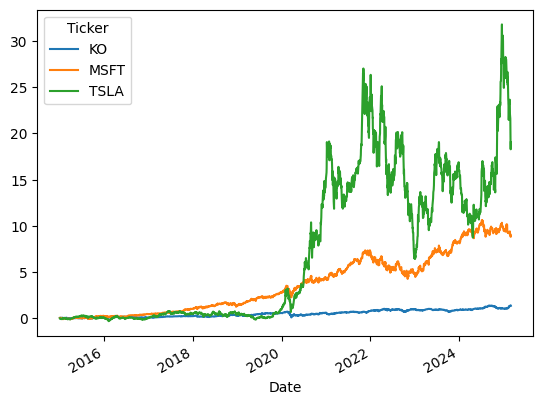

In [14]:
#plotting cumulative returns
cum_ret.plot()

In [17]:
#mean daily returns of the assets
mean_ret = ret_df.mean()

In [18]:
mean_ret

Ticker
KO      0.000393
MSFT    0.001044
TSLA    0.001821
dtype: float64

In [21]:
#std dev of daily returns
#Indicates volatility (risk)
std_ret = ret_df.std()

In [22]:
std_ret

Ticker
KO      0.011242
MSFT    0.017085
TSLA    0.036029
dtype: float64

In [23]:
#Covariance matrix
cov_matrix = ret_df.cov()

In [26]:
#Note all assets have a positive directional relationship
cov_matrix

Ticker,KO,MSFT,TSLA
Ticker,,,
KO,0.000126,0.000075,0.000060
MSFT,0.000075,0.000292,0.000245
TSLA,0.000060,0.000245,0.001298


In [29]:
#Checking strength of relationship btwn stocks
#Correlation matrix
cor_matrix = ret_df.corr()

In [30]:
cor_matrix

Ticker,KO,MSFT,TSLA
Ticker,,,
KO,1.000000,0.387947,0.148996
MSFT,0.387947,1.000000,0.398428
TSLA,0.148996,0.398428,1.000000


In [32]:
#number of assets in our portfolio
num = len(ret_df.columns)

In [34]:
#calculating the weight of e/a asset
#remember we assumed equal weights of e/a asset
w = np.ones(num) / num

In [36]:
#Calculating portfolio expected return
#Equal to daily return vector matrix multiplied by weight vector
pf_exp_ret = w.dot(ret_df.mean())

In [37]:
pf_exp_ret

np.float64(0.0010860510020369808)

In [38]:
#Calculating portfolio variance
pf_var = w.dot(ret_df.cov().dot(w))

In [39]:
pf_var

np.float64(0.00027517752837660314)

In [40]:
#Calculating profile standard deviation
#This is profile volatility/risk
pf_std = pf_var ** (1/2)

In [41]:
pf_std

np.float64(0.016588475770142448)

In [46]:
#Calculating sharpe ratio of e/a stock
#This measures the risk adjusted return of e/a stock
sharpe_ratio = mean_ret / std_ret

In [47]:
sharpe_ratio

Ticker
KO      0.035002
MSFT    0.061114
TSLA    0.050529
dtype: float64

In [49]:
#calculating sharpe ratio of the portfolio
pf_sharpe_ratio = pf_exp_ret / pf_std

In [50]:
pf_sharpe_ratio

np.float64(0.06547021058991816)

In [54]:
ret_df.dropna(inplace = True)

In [56]:
#calculating portfolio daily return
#we know we have an equal weighted portfolio so we can just take the average return of e/a row of e/a day
pf_daily_ret = ret_df.mean(axis = 1)

In [57]:
pf_daily_ret

Date
2015-01-05   -0.017079
2015-01-06   -0.000473
2015-01-07    0.007875
2015-01-08    0.013316
2015-01-09   -0.012746
                ...   
2025-02-24   -0.014162
2025-02-25   -0.028748
2025-02-26   -0.014894
2025-02-27   -0.015819
2025-02-28    0.018427
Length: 2554, dtype: float64

In [58]:
#Calculating cumulative portfolio daily return
pf_cum_ret = (1+pf_daily_ret).cumprod() - 1

In [59]:
pf_cum_ret

Date
2015-01-05    -0.017079
2015-01-06    -0.017544
2015-01-07    -0.009807
2015-01-08     0.003379
2015-01-09    -0.009410
                ...    
2025-02-24    10.729302
2025-02-25    10.392105
2025-02-26    10.222429
2025-02-27    10.044902
2025-02-28    10.248423
Length: 2554, dtype: float64

<Axes: xlabel='Date'>

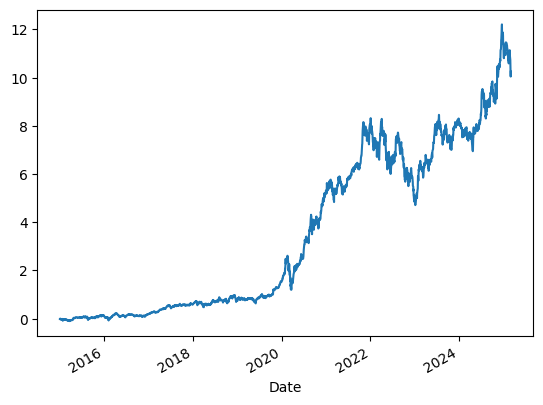

In [60]:
#plotting portfolio cumulative return
pf_cum_ret.plot()

## Efficient Frontier

In [61]:
import yfinance as yf
import pandas as pd
import numpy as np

In [70]:
df = yf.download(['MSFT', 'KO', 'MMM'], start = '2015-01-01')['Close']

[*********************100%***********************]  3 of 3 completed


In [74]:
df

Ticker,KO,MMM,MSFT
Date,,,
2015-01-02,30.662111,97.442451,40.072132
2015-01-05,30.662111,95.244827,39.703636
2015-01-06,30.894953,94.229195,39.120903
2015-01-07,31.280596,94.912224,39.617939
2015-01-08,31.658966,97.187012,40.783413
...,...,...,...
2025-02-24,70.589996,145.479996,404.000000
2025-02-25,71.489998,146.539993,397.899994
2025-02-26,70.800003,147.429993,399.730011


In [71]:
#daily return
ret_df = df.pct_change()

In [72]:
#Dropping the first row
ret_df.dropna(inplace = True)

In [73]:
ret_df

Ticker,KO,MMM,MSFT
Date,,,
2015-01-05,0.000000,-0.022553,-0.009196
2015-01-06,0.007594,-0.010663,-0.014677
2015-01-07,0.012482,0.007249,0.012705
2015-01-08,0.012096,0.023967,0.029418
2015-01-09,-0.011032,-0.012284,-0.008405
...,...,...,...
2025-02-24,-0.010652,0.003449,-0.010313
2025-02-25,0.012750,0.007286,-0.015099
2025-02-26,-0.009652,0.006073,0.004599


In [75]:
#Assigning random weights to e/a asset
#Always sums to 1 because it is assigning a percentage to each asset
def give_weights():
    #Generate n number of random values bwtn 0 and 1 for number of assets we have
    rand = np.random.random(len(ret_df.columns))
    #Divide by the current sum so that they always add up to 1
    rand /= rand.sum()
    return rand

In [82]:
give_weights().sum()

np.float64(1.0)

In [90]:
pf_exp, pf_std, weights = [], [], []

#we are going to do this 2000 times
for i in range(2000):
    #generating weights
    w = give_weights()
    #appending those weights to our weights list
    weights.append(w)
    #calculating the generated profile's expected return and appending it to the exp return list
    #annualizing returns by multiplying by 252 for the number of trading days in a year
    pf_exp.append(w.dot(ret_df.mean() * 252))
    #calculating the generated profile's std and appending it to the std list
    #annualizing returns by multiplying by 252 for the number of trading days in a year
    pf_std.append((w.dot(ret_df.cov().dot(w)) * 252)**(1/2))

In [91]:
#Creating a dataframe from our lists
tog = pd.DataFrame({
    'pf_exp': pf_exp,
    'pf_std': pf_std,
    'weights': weights
})

<Axes: title={'center': 'Efficiency Frontier'}, xlabel='pf_std', ylabel='pf_exp'>

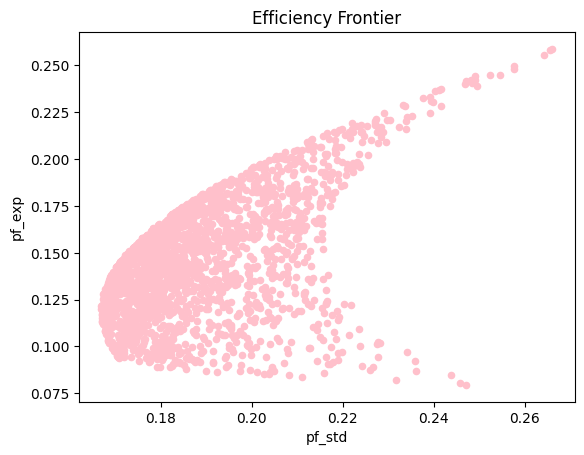

In [95]:
#plotting our data frame
tog.plot(x = 'pf_std', y = 'pf_exp', kind = 'scatter', title = 'Efficiency Frontier')

In [100]:
#Calculating sharpe ratios
sharpes = tog.pf_exp / tog.pf_std

In [103]:
#largest sharpe value
sharpes.nlargest(1)

1572    0.987937
dtype: float64

In [105]:
#printing the weights of e/a stock
for value in tog.loc[sharpes.nlargest(1).index]['weights']:
    print(value)

[0.3177869  0.00185831 0.68035478]


In [109]:
#finding the minimum variance portfolio
tog.nsmallest(1, 'pf_std')

,pf_exp,pf_std,weights
1967,0.120157,0.166955,"[0.6688273714339784, 0.17889387900208675, 0.15..."
